In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


c:\Users\SHEKHAR\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\SHEKHAR\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\SHEKHAR\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [4]:
#df.dropna()

In [11]:
df.dtypes.index

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [20]:
# get all numeric columns
bools = []
col_num = []

for i, type in enumerate(df.dtypes):
    if type != 'object':
        bools.append(True)
        col_num.append(i)

    else:
        bools.append(False)
col_num = list(df.dtypes[col_num].index)
col_num

['Are you self-employed?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you have previous employers?',
 'Have you ever sought treatment for a mental health issue from a mental health professional?',
 'What is your age?']

In [21]:
df.isna().sum()

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

In [9]:
df.head(4)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes


In [4]:
df.dtypes

Are you self-employed?                                                                 int64
How many employees does your company or organization have?                            object
Is your employer primarily a tech company/organization?                              float64
Is your primary role within your company related to tech/IT?                         float64
Does your employer provide mental health benefits as part of healthcare coverage?     object
                                                                                      ...   
What US state or territory do you live in?                                            object
What country do you work in?                                                          object
What US state or territory do you work in?                                            object
Which of the following best describes your work position?                             object
Do you work remotely?                                                 

<Axes: >

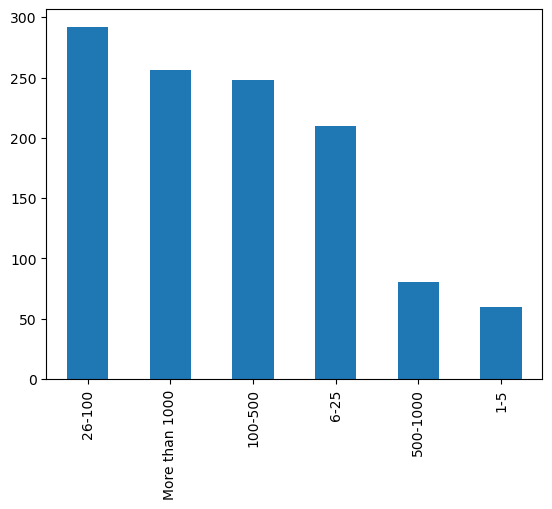

In [5]:
df['How many employees does your company or organization have?'].value_counts().plot(kind = 'bar')

In [22]:
df_num = df[col_num]
df_num

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


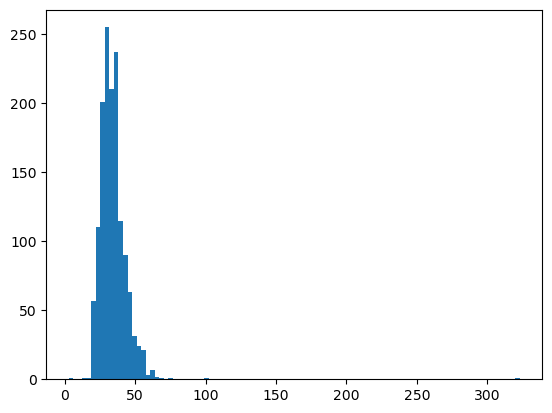

In [31]:
plt.hist(df_num['What is your age?'], bins = 100);


In [33]:
df_num[df_num['What is your age?'] >= 100]

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
564,0,1.0,NaN,NaN,1,0,323


In [40]:
df[df['What is your age?'] > 85]

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
372,0,6-25,1.0,NaN,Yes,No,No,I don't know,Yes,Somewhat easy,...,Rarely,Often,99,Other,United States of America,Michigan,United States of America,Michigan,Supervisor/Team Lead,Sometimes
564,0,100-500,1.0,NaN,Yes,No,I don't know,I don't know,I don't know,I don't know,...,Not applicable to me,Not applicable to me,323,Male,United States of America,Oregon,United States of America,Oregon,Back-end Developer,Sometimes


In [37]:
df_num.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


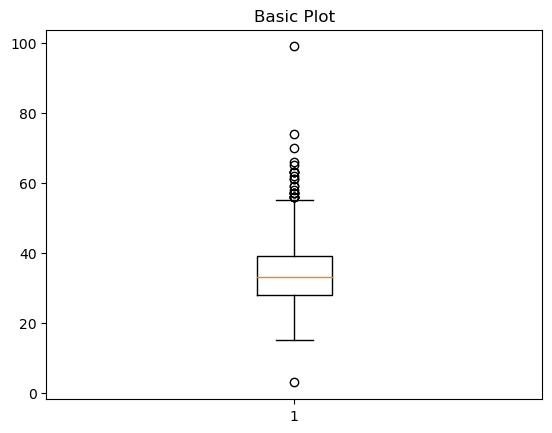

In [39]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_num[df_num['What is your age?'] <= 100] ['What is your age?']);

In [8]:
# Check summary statistics for numerical features
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [11]:
# Explore other columns and their unique values
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

Are you self-employed?: [0 1]
How many employees does your company or organization have?: ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
Is your employer primarily a tech company/organization?: [ 1. nan  0.]
Is your primary role within your company related to tech/IT?: [nan  1.  0.]
Does your employer provide mental health benefits as part of healthcare coverage?: ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
Do you know the options for mental health care available under your employer-provided coverage?: [nan 'Yes' 'I am not sure' 'No']
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: ['No' 'Yes' nan "I don't know"]
Does your employer offer resources to learn more about mental health concerns and options for seeking help?: ['No' 'Yes' nan "I don't know"]
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment res

In [19]:
# Handle non-standardized textual inputs - encode text data using techniques like Label Encoding or One-Hot Encoding
# Example using Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
# Check column names
print(df.columns)

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [44]:
df_num['Are you self-employed?'].value_counts()

0    1146
1     287
Name: Are you self-employed?, dtype: int64

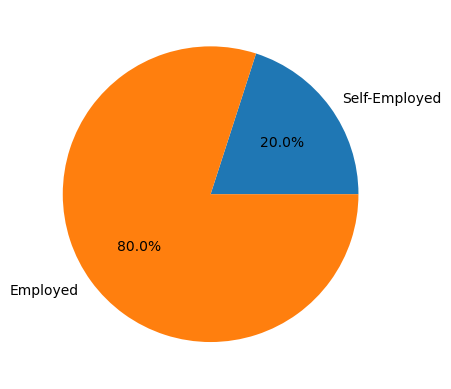

In [47]:
labels = 'Self-Employed', 'Employed'
sizes = [287, 1146]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');

In [48]:
df_num

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


In [50]:
df_num['Is your employer primarily a tech company/organization?'].value_counts()

1.0    883
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [52]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 1, 'Are you self-employed?'].value_counts()

# There is no self-employed person working for tech

0    883
Name: Are you self-employed?, dtype: int64

In [53]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 0, 'Are you self-employed?'].value_counts()

0    263
Name: Are you self-employed?, dtype: int64

In [54]:
883 + 263

1146

In [55]:
df_num[df_num['Are you self-employed?']== 1]

# Self employed people did not respond to Q:

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
3,1,NaN,NaN,1.0,1,1,43
9,1,NaN,NaN,1.0,1,1,30
18,1,NaN,NaN,1.0,0,1,25
24,1,NaN,NaN,1.0,1,0,38
33,1,NaN,NaN,0.0,1,0,37
...,...,...,...,...,...,...,...
1404,1,NaN,NaN,0.0,1,1,29
1408,1,NaN,NaN,1.0,1,0,34
1420,1,NaN,NaN,1.0,1,0,29
1428,1,NaN,NaN,1.0,1,1,34


In [ ]:
# 1. Check for all numeric data

# 2. Create a function to know which columns are object

# 3. Check for non-Numeric ( Strings / Object ) 